<a href="https://colab.research.google.com/github/meghutch/Breast-Cancer-Classification-Clinical-Genomic/blob/master/Gene_Expression_Analysis_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Clinical Outcomes of Breast Cancer Patients - Gene Expression Data**

## **Principal Component Analysis**

**Author:** Meg Hutch

**Date:** November 19, 2019

**Objective:** Apply Principal Component Analysis to Determine Which Genes to Include into our Neural Network 

****Update: I previously did some testing and these methods don't seem to be causing significant differences. I will probably just need to later validate whether the PC change using the different methods, but for now, I think I can go ahead, clean up the code****

**References**

* https://www.youtube.com/watch?v=Lsue2gEM9D0&list=PLblh5JKOoLUIcdlgu78MnlATeyx4cEVeR&index=54&t=0s

* https://www.youtube.com/watch?v=FgakZw6K1QQ

* https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60 

* https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python 

* https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

In [9]:
# Connect Colab to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Import Data
gene_data = pd.read_csv('/content/drive/My Drive/Projects/Breast_Cancer_Classification/Data/merged_expression.txt', sep=',')

In [0]:
#gene_data.head()
#genes.info()

# **Data Pre-Processing**

**Check if NAs**

In [12]:
gene_data.isna().any()

Unnamed: 0    False
EVENT          True
OS_MONTHS     False
FIVE_YEAR      True
RERE          False
              ...  
CC2D1A        False
CB986545      False
IGSF9         False
DA110839      False
FAM71A         True
Length: 24372, dtype: bool

**Remove cases where there are missing values**

In [0]:
gene_data = gene_data.dropna()

**Check number of patients after removing Nas**

In [14]:
gene_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1747 entries, 0 to 1903
Columns: 24372 entries, Unnamed: 0 to FAM71A
dtypes: float64(24371), object(1)
memory usage: 324.9+ MB


**Create a dataset just containing gene expression**

In [0]:
# remove event, os_motnhs, and Five_Year from the dataset
genes = gene_data.drop(columns=["Unnamed: 0", "EVENT", "OS_MONTHS", "FIVE_YEAR"])

# **Principal Component Analysis**

**What is a Pricipal Component? (From DataCamp)**

Principal componenets have both direction and magnitude. The direction represents across which principal axes the data is mostly spread out or has the most variance and the magnitude signifies the amount of varaince that Principal Component captures of the data when projected onto that axis. 

The principal components are a straight line, and the first principal component holds the most variance in the data. Each subsequent prinicpal component is orthogonal to the last and has a lesser variance .

Correlated features contribute to the same principal component, thereby reducing the original data features into uncorrelated prinicpal components; each representing a different set of correlated features with differents of variation.

Each principal component represents a percentage of total variation captured from the data

****Note:** I troubleshooted some discrepancies among the references above in regards to fit and fit transform. Some articles would initially use fit_transform to scale and then again used pca.fit_transform when identifying prinicipal components, other references, instead of fit_transform just used pca.transform for this step. I tested both methods and got the same results. Actually looks like maybe using fit_transform is probably just combining these steps?****** 


**1) Standardize the Data**

Must scale features in your data before applying PCA. **StandardScaler** helps standardize features onto unit scale (mean = 0 and standard deviation = 1). Thus, each value in the dataset will have the sample mean value subtracted and then divided by the standard deviation of the whole dataset. 


In [0]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

# Stanardize/Scale the data
x = StandardScaler().fit_transform(genes)

**Let's check whether the normalized data has a mean of zero and a standard deviation of 1**

In [17]:
np.mean(x), np.std(x)

(4.1760406566772064e-19, 0.9999999999999999)

Convert the normalized features into tabular format 

In [0]:
# Create list of column names
features = list(genes.columns.values) 

# Create data frame of newly normalized data
x = pd.DataFrame(x, columns = features)

**2) Determine Prinicpal Components**

In [0]:
# Define pca function
pca = PCA()

# Fit to the scaled/standardized data
principalComponents = pca.fit_transform(x)

# Create  a dataframe of the components
principalDf = pd.DataFrame(data = principalComponents)

In [0]:
# Generate a list of column names with the number for each prinicpal component 
col_names = [f'pc{i}' for i in range(1, 1748)] # there are 1747 samples - so we want to have range of 1 less than 1748 column names 

# Add column names to the principal component dataset 
principalDf = pd.DataFrame(principalComponents, columns = col_names)

**4) Determine # of Components and Variance**

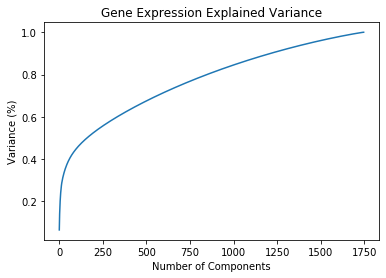

In [42]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Gene Expression Explained Variance')
plt.show()

The plot tells us that with ~1250 components we can capture 90% of the data. 

**Fit PCA to the data**

In [43]:
pca = PCA(0.9)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

**Determine how many n_components are actually needed to capture 0.9 variance**

In [44]:
pca.n_components_

1213

This function indicates that 1213 is the number of principal componenets needed to capture 90% of the variation which is what I had estiamted from the above plot.

**Scree Plot**

View which principal components contribute to the variance 

In [0]:
# remove PC from 
col_names
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
per_var = per_var[:10] #top 10 PC - this number is chosen just so that we can more easily view the plot
labels = col_names[:10]

plt.bar(x=range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Prinicpal Component')
plt.title('Scree Plot')
plt.show()

**Next Steps:**

Follow the youtube video and identify the genes that are important 

# **Drafts**

In [0]:
# the below function is trying to concatenate the princpalDf to a dataframe that has labels 
label = gene_data.FIVE_YEAR
label = pd.DataFrame(label)

label = label.reset_index(drop=True)
prinicpalDf = principalDf.reset_index(drop=True)

finalDf = pd.concat([principalDf, label], axis=1)

In [0]:
finalDf

**3) Visualize 2D Projection**

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


targets = [1, 0] #make sure this is labeled correctly
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['FIVE_YEAR'] ==  target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

The explained variance tells you how much information (variance) can be attributed to each of the prinicpal componenets. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the varaince (information) when you do this. By using the attribute **explained_varaince_ratio_** you cna see how much variation the first prinicpal component and second component contain. Additionally, we can determine how much information the two components together contain. 

In [0]:
print('Component Variation', pca.explained_variance_ratio_)
print('Total Variation', sum(pca.explained_variance_ratio_))

**4) Determine # of Components and Variance**

In [0]:
pca = PCA().fit(x)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Gene Expression Explained Variance')
plt.show()

The plot tells us that with ~1250 components we can capture 90% of the data. 

In [0]:
# 100 Prinicipal Components
pca = PCA(n_components = 100)

# Fit components with normalized data
principalComponents = pca.fit_transform(x)

# Generate a vector of column names with the number for each prinicpal component 
col_names = [f'principal component {i}' for i in range(1, 101)]

# Add column names to the principal component dataset 
principalDf = pd.DataFrame(principalComponents, columns = col_names)

In [0]:
principalComponents

In [0]:
# the below function is trying to concatenate the princpalDf to a dataframe that has labels 
label = gene_data.FIVE_YEAR
label = pd.DataFrame(label)

label = label.reset_index(drop=True)
prinicpalDf = principalDf.reset_index(drop=True)

finalDf = pd.concat([principalDf, label], axis=1)

In [0]:
finalDf

**5) Fitting Principal Components to Data**

I'm specifically following the datacamp reference now: https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

**Fit PCA to the data**

In [0]:
pca = PCA(0.9)
pca.fit(x)

**Determine how many n_components are actually needed to capture 0.9 variance**

In [0]:
pca.n_components_

This function indicates that 1213 is the number of principal componenets needed to capture 90% of the variation which is what I had estiamted from the above plot.

Next, we can transform the data to generate a transformed dataset from the parameters generated from the fit model. 

In [0]:
transformed_data  = pca.transform(genes)

In [0]:
transformed_data.shape # this has 1213 columns - or principal components!

In [0]:
transformed_data

**Questions:**

1) Is there a such thing as too many prinicipal components?

2) Also, is this just the data that I feed into the ML model? I'm not sure I understand what the specific values are? The normalized gene expression? 